# 1. DATA IMPORT & INITIAL SETUP

In [1]:
import kagglehub
zaheenhamidani = kagglehub.dataset_download('zaheenhamidani/ultimate-spotify-tracks-db')

print('Data source import complete.')

import os

for dirpath, dirnames, filenames in os.walk(zaheenhamidani):
    for file in filenames:
        print(os.path.join(dirpath, file))


Data source import complete.
/kaggle/input/SpotifyFeatures.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


2025-07-24 16:01:20.198901: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753372880.450439      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753372880.525944      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. DATA EXPLORATION & CLEANING

In [3]:
df = pd.read_csv('/kaggle/input/SpotifyFeatures.csv')
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
df.describe(include = 'object').T

count  unique                     top    freq
genre           232725      27                  Comedy    9681
artist_name     232725   14564          Giuseppe Verdi    1394
track_name      232724  148614                    Home     100
track_id        232725  176774  3R73Y7X53MIQZWnKloWq5i       8
key             232725      12                       C   27583
mode            232725       2                   Major  151744
time_signature  232725       5                     4/4  200760

In [6]:
df.describe().T

count           mean            std          min  \
popularity        232725.0      41.127502      18.189948      0.00000   
acousticness      232725.0       0.368560       0.354768      0.00000   
danceability      232725.0       0.554364       0.185608      0.05690   
duration_ms       232725.0  235122.339306  118935.909299  15387.00000   
energy            232725.0       0.570958       0.263456      0.00002   
instrumentalness  232725.0       0.148301       0.302768      0.00000   
liveness          232725.0       0.215009       0.198273      0.00967   
loudness          232725.0      -9.569885       5.998204    -52.45700   
speechiness       232725.0       0.120765       0.185518      0.02220   
tempo             232725.0     117.666585      30.898907     30.37900   
valence           232725.0       0.454917       0.260065      0.00000   

                          25%            50%          75%          max  
popularity            29.0000      43.000000      55.0000      100.000  
acousticness           0.0376       0.232000       0.7220        0.996  
danceability           0.4350       0.571000       0.6920        0.989  
duration_ms       182857.0000  220427.000000  265768.0000  5552917.000  
energy                 0.3850       0.605000       0.7870        0.999  
instrumentalness       0.0000       0.000044       0.0358        0.999  
liveness               0.0974       0.128000       0.2640        1.000  
loudness             -11.7710      -7.762000      -5.5010        3.744  
speechiness            0.0367       0.050100       0.1050        0.967  
tempo                 92.9590     115.778000     139.0540      242.903  
valence                0.2370       0.444000       0.6600        1.000

In [7]:
# Checking for duplicate entries based on the 'track_id' column.
duplicate_count = df.duplicated(subset='track_id', keep='first').sum()

print("Number of duplicate entries based on track id:", duplicate_count)

Number of duplicate entries based on track id: 55951


In [8]:
# Removing duplicate entries to ensure data integrity.
df = df.drop_duplicates(subset='track_id', keep='first')

In [9]:
# Converting track duration from milliseconds to minutes for better interpretability.
df['duration_ms'] = round(df['duration_ms'] / 1000 /60,1)
df['duration_ms'] = df['duration_ms'].rename('duration_min')

In [10]:
df.describe().T

count        mean        std       min      25%  \
popularity        176774.0   36.273162  17.391016   0.00000  25.0000   
acousticness      176774.0    0.404135   0.366302   0.00000   0.0456   
danceability      176774.0    0.541068   0.190387   0.05690   0.4150   
duration_ms       176774.0    3.935457   2.175555   0.30000   3.0000   
energy            176774.0    0.557025   0.275839   0.00002   0.3440   
instrumentalness  176774.0    0.172073   0.322936   0.00000   0.0000   
liveness          176774.0    0.224531   0.211027   0.00967   0.0975   
loudness          176774.0  -10.137605   6.395551 -52.45700 -12.8510   
speechiness       176774.0    0.127395   0.204345   0.02220   0.0368   
tempo             176774.0  117.203679  31.325091  30.37900  92.0060   
valence           176774.0    0.451595   0.267820   0.00000   0.2220   

                        50%        75%      max  
popularity         37.00000   49.00000  100.000  
acousticness        0.28800    0.79100    0.996  
danceability        0.55800    0.68300    0.989  
duration_ms         3.70000    4.50000   92.500  
energy              0.59200    0.78900    0.999  
instrumentalness    0.00007    0.09080    0.999  
liveness            0.13000    0.27700    1.000  
loudness           -8.19100   -5.63100    3.744  
speechiness         0.04940    0.10200    0.967  
tempo             115.00650  138.79975  242.903  
valence             0.44000    0.66700    1.000

In [11]:
df['key'].value_counts()

key
C     20970
G     20476
D     18643
A     17499
C#    16856
F     15605
E     13408
B     12893
A#    11924
F#    11365
G#    11175
D#     5960
Name: count, dtype: int64

In [12]:
df['time_signature'].value_counts()

time_signature
4/4    149187
3/4     20806
5/4      4430
1/4      2345
0/4         6
Name: count, dtype: int64

In [13]:
# Identifying songs with incorrect time signatures.
df.loc[df['time_signature'] == '0/4','track_name']

14520                                               Imma Be
59106     Adagio for Strings and Organ in G minor (Arr. ...
80544                      Aida: Numi, pietà del mio martir
82665                                Fra poco a me ricovero
167567    Good to Be in Austin/Airport Security/Broke Tooth
208898                                               Nanou2
Name: track_name, dtype: object

In [14]:
#fixing incorrect data in Time Signature
df['time_signature'] = df['time_signature'].replace('0/4','4/4')

In [15]:
df.duplicated().sum()

0

In [16]:
df['time_signature'].value_counts()

time_signature
4/4    149193
3/4     20806
5/4      4430
1/4      2345
Name: count, dtype: int64

In [17]:
df['genre'].value_counts()

genre
Comedy              9674
Electronic          9149
Alternative         9095
Anime               8935
Classical           8711
Reggae              8687
Reggaeton           8549
Blues               8496
Soundtrack          8480
Opera               8280
Folk                8048
Jazz                8039
Ska                 8017
Dance               7982
World               7973
Movie               7802
Hip-Hop             7413
Country             7383
Children's Music    5402
R&B                 5353
Soul                4430
Indie               3318
Pop                 2417
Rock                2227
Rap                 1456
Children’s Music    1339
A Capella            119
Name: count, dtype: int64

In [18]:
# Removing columns that are not relevant.
del_col = ['artist_name','track_name','track_id']
for i in df.columns:
  if i in del_col:
    df.drop(i,axis = 1,inplace = True)

In [19]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [20]:
# Standardizing genre names for consistency.
df['genre'].replace("Children’s Music","Children's Music",inplace = True)
df['genre'].replace("Children's Music","Children Music", inplace = True)
df['genre'].replace('A Capella','Acapella',inplace = True)

/tmp/ipykernel_13/3480817579.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_13/3480817579.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

# 3. FEATURE ENGINEERING & DATA VISUALIZATION

In [21]:
import plotly.io as pio
pio.renderers.default = 'colab'

def grouping(col1, col2):
    g = df.groupby(col1)[col2].mean().sort_values(ascending=False)
    g = pd.DataFrame(g)
    g.reset_index(inplace=True)
    return g

def plots(df, col1, col2, visual):
    if visual == 'bar':
        fig = px.bar(df, x=col1, y=col2, title=f'{col2} by {col1}')
    elif visual == 'line':
        fig = px.line(df, x=col1, y=col2, title=f'{col2} by {col1}')
    elif visual == 'scatter':
        fig = px.scatter(df, x=col1, y=col2, title=f'{col2} by {col1}')
    return fig

plots(grouping('genre', 'popularity'), 'genre', 'popularity', 'bar')


In [22]:
import plotly.io as pio
pio.renderers.default = 'colab'
px.pie(df, names='mode', title='Mode Distribution')

In [23]:
pio.renderers.default = 'colab'
plots(grouping('genre','danceability'),'danceability','genre','bar')

In [24]:
pio.renderers.default = 'colab'
plots(grouping('genre', 'energy'), 'genre', 'energy', 'bar')


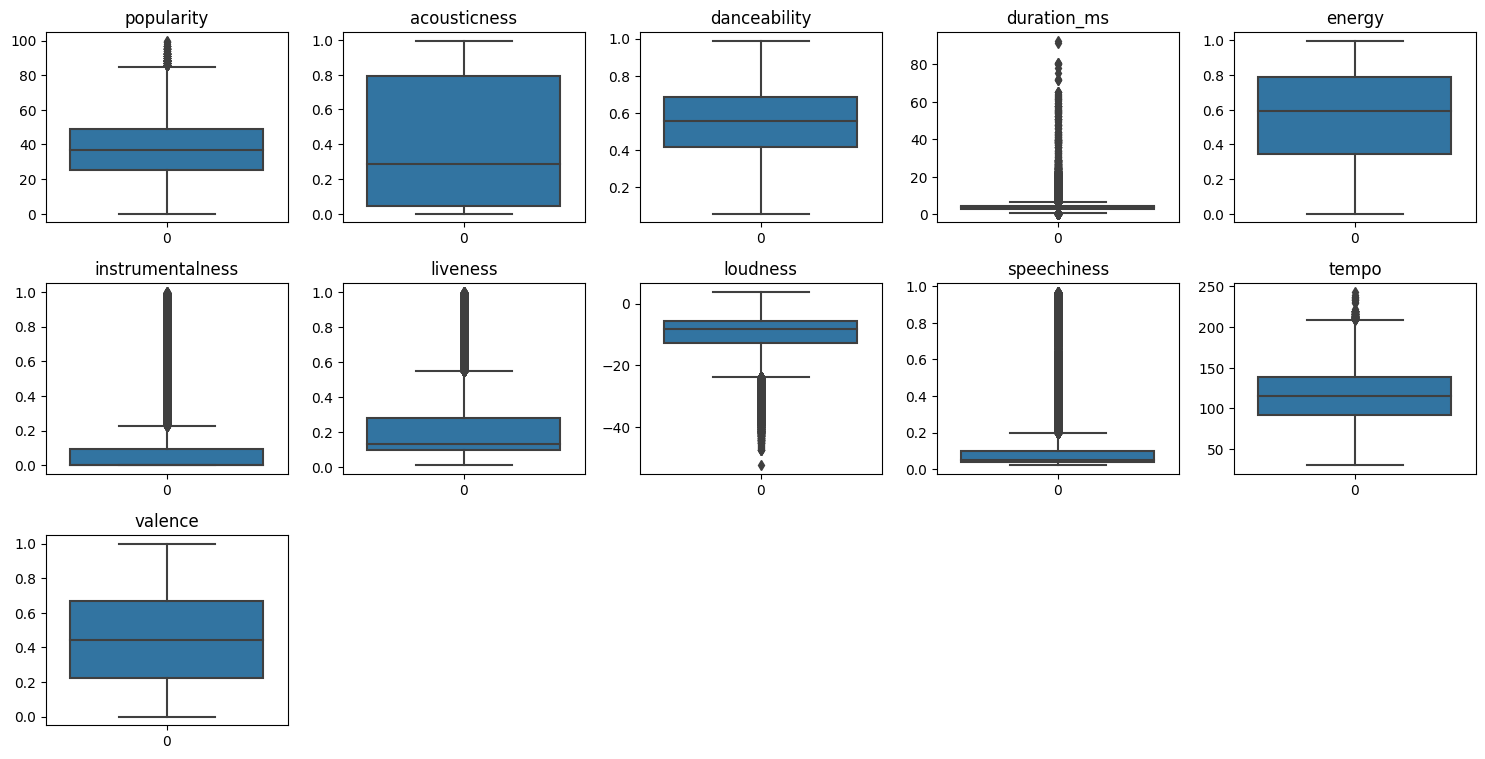

In [25]:
plt.figure(figsize=(15,15))
t = 1
for i in df.select_dtypes(include = 'number'):
    plt.subplot(6,5,t)
    sns.boxplot(df[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

In [26]:
def outliers(col):
    outliers = []
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    L = q1 - 1.5 * IQR
    U = q3 + 1.5 * IQR
    outliers = df[(df[col] < L) | (df[col] > U)]['speechiness']
    return outliers

In [27]:
"""Handling skewed features"""
skewness = df.select_dtypes(include = 'number').apply(lambda x: x.skew())
pos_skew = skewness[skewness > 2]
neg_skew = skewness[skewness < -2]
print('Positive Skewness:\n',pos_skew)
print('Negative Skewness:\n',neg_skew)

Positive Skewness:
 duration_ms    9.445646
speechiness    3.102435
dtype: float64
Negative Skewness:
 Series([], dtype: float64)


In [28]:
# Applying log transformation to skewed features
df['speechiness'] = np.log1p(df['speechiness'])
df['duration_ms'] = np.log1p(df['duration_ms'])

In [29]:
print('Liveness:',len(outliers('liveness')))
print('Popularity:',len(outliers('popularity')))
print('duration_ms',len(outliers('duration_ms')))
print('speechiness:',len(outliers('speechiness')))
print('Loudness:',len(outliers('loudness')))

Liveness: 17671
Popularity: 175
duration_ms 11973
speechiness: 24865
Loudness: 8621


In [30]:
outliers('liveness').index

Index([    15,     52,     54,     57,     61,     84,    150,    326,    330,
          336,
       ...
       232464, 232465, 232487, 232493, 232496, 232498, 232531, 232554, 232582,
       232665],
      dtype='int64', length=17671)

In [31]:
import plotly.io as pio
pio.renderers.default = 'colab'

corr = df.corr(numeric_only=True)
fig = px.imshow(corr,
                title="Correlation Heatmap",
                color_continuous_scale='Viridis',
                text_auto=True,
                labels={'x': 'Features', 'y': 'Features'})
fig.update_layout(height=730, width=800)
fig.show()


In [32]:
df_vis = df.copy()

#  DATA PREPROCESSING

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_col = df.select_dtypes(include = 'number').columns
df[num_col] = scaler.fit_transform(df[num_col])

In [34]:
#Applying frequency encoding to categorical columns.
for col in df.columns:
    if df[col].dtype == 'object':
        frequency_map = df[col].value_counts(normalize=True)
        df[col+'_encoded'] = df[col].map(frequency_map)

print(df)

        genre  popularity  acousticness  danceability  duration_ms    energy  \
0       Movie   -2.085747      0.564740     -0.798733    -1.646341  1.279646   
1       Movie   -2.028246     -0.431708      0.257016    -1.039247  0.652467   
2       Movie   -1.913244      1.495668      0.640447    -0.612439 -1.544471   
3       Movie   -2.085747      0.815900     -1.581352    -0.861235 -0.837536   
4       Movie   -1.855743      1.490208     -1.103376    -2.002673 -1.203692   
...       ...         ...           ...           ...          ...       ...   
232716   Soul    0.156796     -0.472658      1.023878     0.030629  0.521956   
232717   Soul    0.386801     -0.819368      1.370541    -0.168915 -0.148727   
232719   Soul   -0.245712      0.441890     -0.620148    -0.948932 -0.797657   
232721   Soul    0.099295     -1.013470      1.281249     0.614225  0.456700   
232724   Soul   -0.073208     -0.837659      1.139432     0.964654 -0.315491   

        instrumentalness key  liveness 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   genre                   176774 non-null  object 
 1   popularity              176774 non-null  float64
 2   acousticness            176774 non-null  float64
 3   danceability            176774 non-null  float64
 4   duration_ms             176774 non-null  float64
 5   energy                  176774 non-null  float64
 6   instrumentalness        176774 non-null  float64
 7   key                     176774 non-null  object 
 8   liveness                176774 non-null  float64
 9   loudness                176774 non-null  float64
 10  mode                    176774 non-null  object 
 11  speechiness             176774 non-null  float64
 12  tempo                   176774 non-null  float64
 13  time_signature          176774 non-null  object 
 14  valence                 1

In [36]:
# Dropping original categorical columns.
obj_list = df.select_dtypes(include = 'object').columns
df.drop(obj_list,axis = 1,inplace = True)

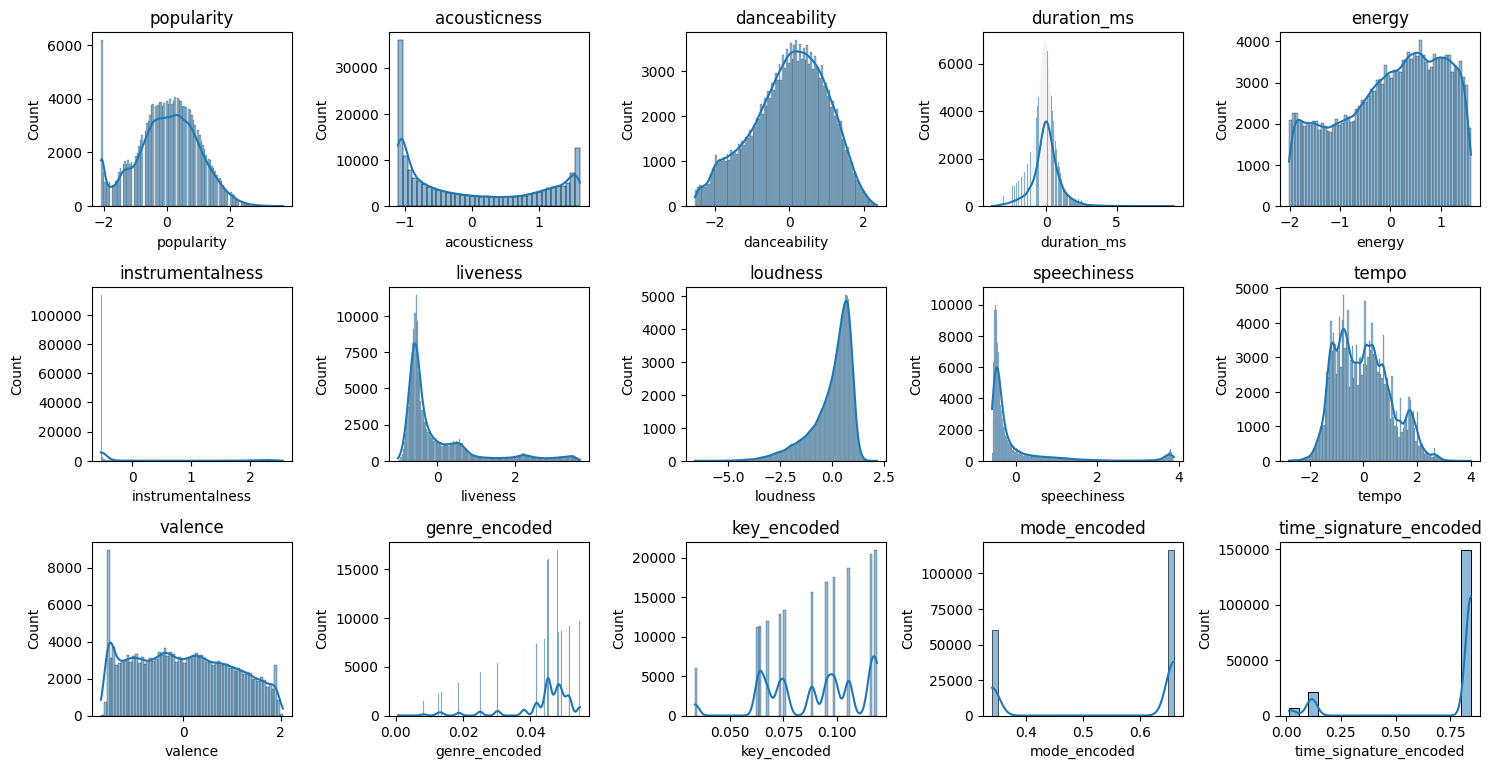

In [37]:
plt.figure(figsize=(15,15))
t = 1
for i in df.select_dtypes(include = 'number'):
    plt.subplot(6,5,t)
    sns.histplot(df[i], kde = True)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

In [38]:
df1 = df.copy()

# CLUSTERING MODELS

**1. K-Means Clustering (Without PCA)**

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++',n_init=10, random_state = 42)
df1['cluster'] = kmeans.fit_predict(df1)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   popularity              176774 non-null  float64
 1   acousticness            176774 non-null  float64
 2   danceability            176774 non-null  float64
 3   duration_ms             176774 non-null  float64
 4   energy                  176774 non-null  float64
 5   instrumentalness        176774 non-null  float64
 6   liveness                176774 non-null  float64
 7   loudness                176774 non-null  float64
 8   speechiness             176774 non-null  float64
 9   tempo                   176774 non-null  float64
 10  valence                 176774 non-null  float64
 11  genre_encoded           176774 non-null  float64
 12  key_encoded             176774 non-null  float64
 13  mode_encoded            176774 non-null  float64
 14  time_signature_encoded  1

> K-Means Evaluation Metrics (Without PCA)

In [41]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_index = calinski_harabasz_score(df1, df1['cluster'])
print("Calinski-Harabasz Index:", calinski_harabasz_index)

Calinski-Harabasz Index: 59805.22080455595


In [42]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score_value = davies_bouldin_score(df1, df1['cluster'])
print("Davies Bouldin Index:", davies_bouldin_score_value)

Davies Bouldin Index: 1.1468638047831494


In [43]:
df1['cluster'].value_counts()

cluster
0    121411
2     44782
1     10581
Name: count, dtype: int64

In [44]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176774 non-null  object 
 1   popularity        176774 non-null  int64  
 2   acousticness      176774 non-null  float64
 3   danceability      176774 non-null  float64
 4   duration_ms       176774 non-null  float64
 5   energy            176774 non-null  float64
 6   instrumentalness  176774 non-null  float64
 7   key               176774 non-null  object 
 8   liveness          176774 non-null  float64
 9   loudness          176774 non-null  float64
 10  mode              176774 non-null  object 
 11  speechiness       176774 non-null  float64
 12  tempo             176774 non-null  float64
 13  time_signature    176774 non-null  object 
 14  valence           176774 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 25.6+ MB


In [45]:
df_vis['cluster'] = kmeans.labels_
df_grouped = df_vis.groupby('cluster')['valence'].mean()
df_grouped = pd.DataFrame(df_grouped).reset_index()
plots(df_grouped,'cluster','valence','bar')

In [46]:
"""Cluster characteristics analysis"""
for cluster in df1['cluster'].unique():
    print(f"\nCluster {cluster} characteristics:")
    print(df_vis[df_vis['cluster']==cluster].mean(numeric_only=True).sort_values(ascending=False)[:5])


Cluster 0 characteristics:
tempo           123.121605
popularity       41.032888
duration_ms       1.552046
energy            0.680164
danceability      0.608498
dtype: float64

Cluster 2 characteristics:
tempo           105.575688
popularity       27.125966
cluster           2.000000
duration_ms       1.520160
acousticness      0.837151
dtype: float64

Cluster 1 characteristics:
tempo           98.512000
popularity      20.371704
duration_ms      1.442945
cluster          1.000000
acousticness     0.785892
dtype: float64


# K-Means With PCA

In [47]:
# Reducing dimensions for visualization using PCA.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df1_2d = pca.fit_transform(df1)
df1 = pd.DataFrame(df1_2d, columns=['Component 1', 'Component 2'])
df3 = df1.copy()
df1['Cluster'] = kmeans.labels_

# PCA Analysis

In [48]:
# Feature importance in PCA components
df_original = df_vis.select_dtypes(include=['float64', 'int64'])  # Best option

# Perform PCA
pca = PCA(n_components=2).fit(df_original)
loadings = pd.DataFrame(pca.components_.T, 
                       columns=['PC1','PC2'], 
                       index=df_original.columns)

# Print top positive/negative features for each component
for pc in ['PC1','PC2']:
    print(f"\n{pc}:")
    print("Increases with:", loadings[pc].nlargest(3).index.tolist())
    print("Decreases with:", loadings[pc].nsmallest(3).index.tolist())


PC1:
Increases with: ['tempo', 'popularity', 'loudness']
Decreases with: ['acousticness', 'instrumentalness', 'liveness']

PC2:
Increases with: ['popularity', 'loudness', 'energy']
Decreases with: ['tempo', 'acousticness', 'instrumentalness']


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



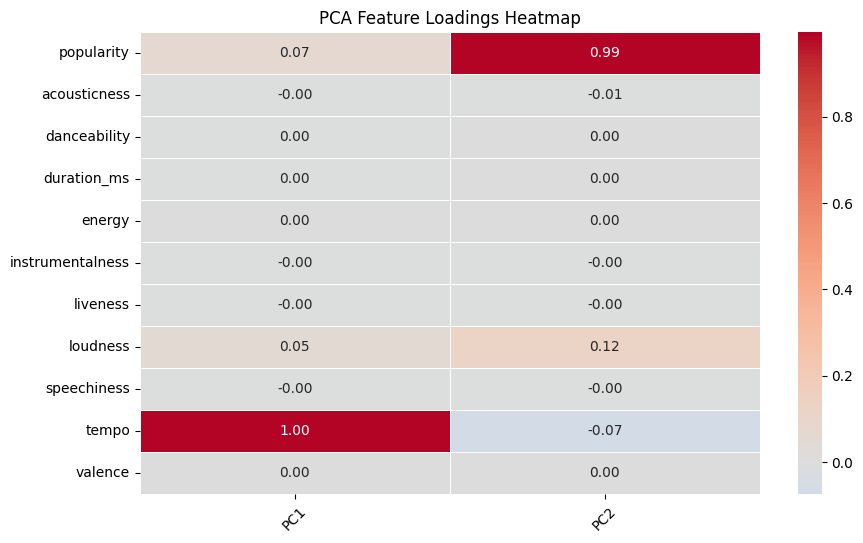

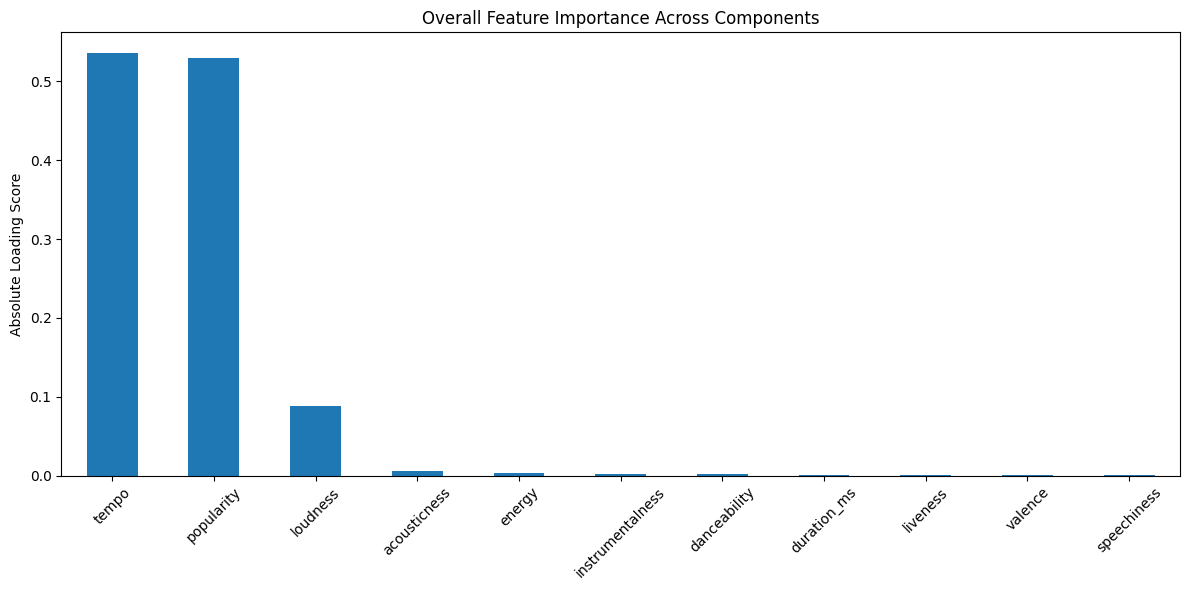

In [49]:
clean_loadings = loadings.replace([np.inf, -np.inf], np.nan).dropna(how='all')

plt.figure(figsize=(10, 6))
sns.heatmap(clean_loadings, annot=True, cmap='coolwarm', center=0, 
            fmt=".2f", linewidths=0.5)
plt.title('PCA Feature Loadings Heatmap')
plt.xticks(rotation=45)
plt.show()

# 3. Feature Importance Bar Plot
plt.figure(figsize=(12, 6))
loadings.abs().mean(axis=1).sort_values(ascending=False).plot(kind='bar')
plt.title('Overall Feature Importance Across Components')
plt.ylabel('Absolute Loading Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
centroids = df1.groupby('Cluster').mean()
centroids = pd.DataFrame(centroids)
centroids

Component 1  Component 2
Cluster                          
0          -1.193466    -0.260843
1           0.496483     4.356511
2           3.118364    -0.322161

In [51]:
centroid_list = centroids.values.tolist()
centroid_list

[[-1.193465534269983, -0.2608431276862302],
 [0.49648310402624557, 4.356511224409546],
 [3.1183635446731093, -0.32216114264580675]]

In [52]:
[c[0] for c in centroid_list]

[-1.193465534269983, 0.49648310402624557, 3.1183635446731093]

In [53]:
[c[1] for c in centroid_list]

[-0.2608431276862302, 4.356511224409546, -0.32216114264580675]

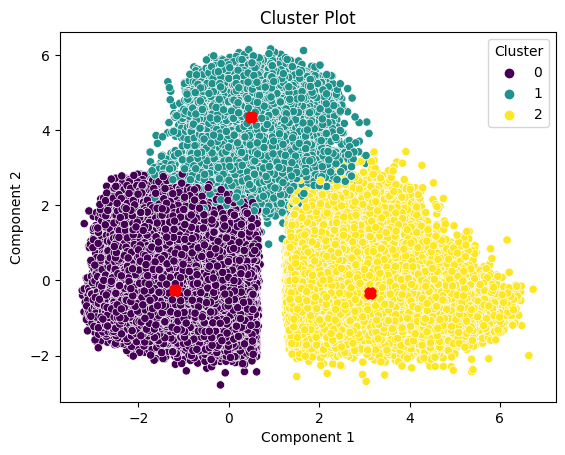

In [54]:
sns.scatterplot(data=df1, x='Component 1', y='Component 2', hue='Cluster', palette='viridis')
plt.scatter([c[0] for c in centroid_list],[c[1] for c in centroid_list], marker='X', linewidths=3, color='red')
plt.title('Cluster Plot')
plt.show()

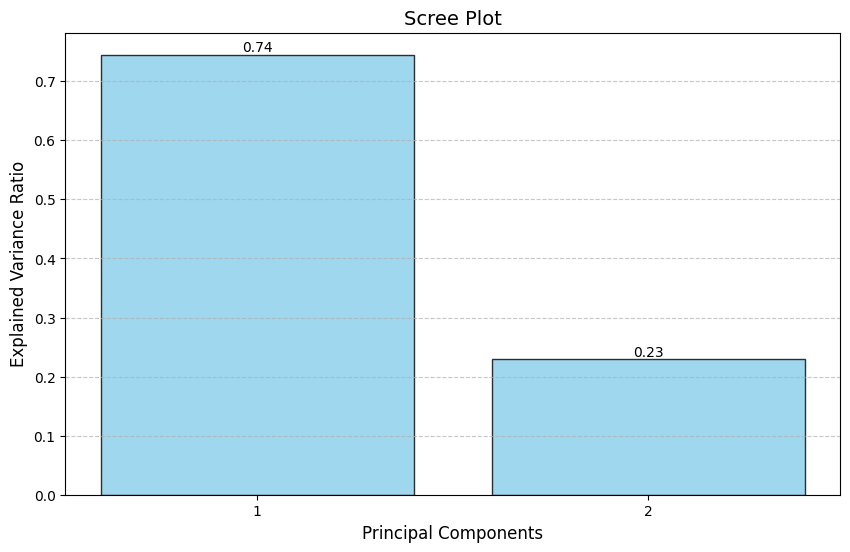

In [55]:
# Creating a scree plot to visualize explained variance by PCA components.
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue', edgecolor='black', alpha=0.8)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Scree Plot', fontsize=14)
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xticks(range(1, len(explained_variance) + 1), fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


> K-Means Evaluation Metrics (With PCA)

In [56]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score_value = calinski_harabasz_score(df1, kmeans.labels_)

print("Calinski-Harabasz Index:", calinski_harabasz_score_value)

Calinski-Harabasz Index: 347322.9271944536


In [57]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score_value = davies_bouldin_score(df1, kmeans.labels_)
print("Davies Bouldin Index:", davies_bouldin_score_value)

Davies Bouldin Index: 0.4505752845175744


# DBSCAN Clustering

In [58]:
from sklearn.cluster import DBSCAN

# Model setup (memory-efficient)
dbscan = DBSCAN(eps=0.5,  # clustering sensitivity
               min_samples=5,
               metric='euclidean')

df1['dbscan_cluster'] = dbscan.fit_predict(
    df1.drop('cluster', axis=1, errors='ignore'))

# Results analysis
print("\nDBSCAN Evaluation:")
print("Clusters found:", len(np.unique(df1['dbscan_cluster'])))
print("Points noise:", sum(df1['dbscan_cluster'] == -1))


DBSCAN Evaluation:
Clusters found: 4
Points noise: 3


In [59]:
noise_ratio = (df1['dbscan_cluster'] == -1).mean()
print(f"Noise ratio: {noise_ratio:.2%}")

Noise ratio: 0.00%


In [60]:
df1['dbscan_cluster'].value_counts()

dbscan_cluster
 0    121411
 1     44781
 2     10579
-1         3
Name: count, dtype: int64

# Noise point reclassification using KNN

In [61]:
# Reclassifying noise using KNN
from sklearn.neighbors import NearestNeighbors

noise_mask = df1['dbscan_cluster'] == -1
if noise_mask.any():
    knn = NearestNeighbors(n_neighbors=3).fit(df1[~noise_mask][['Component 1', 'Component 2']])
    distances, indices = knn.kneighbors(df1[noise_mask][['Component 1', 'Component 2']])
    df1.loc[noise_mask, 'dbscan_cluster'] = df1.iloc[indices[:,0]]['dbscan_cluster'].values

In [62]:
df1['dbscan_cluster'].value_counts()

dbscan_cluster
0    121412
1     44783
2     10579
Name: count, dtype: int64

In [63]:
for cluster_id in df1['dbscan_cluster'].unique():
    cluster_data = df1[df1['dbscan_cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} stats:")
    print(cluster_data.describe().loc[['mean', 'std']])


Cluster 0 stats:
      Component 1  Component 2   Cluster  dbscan_cluster
mean    -1.193401    -0.260857  0.000016             0.0
std      0.789254     0.748020  0.005740             0.0

Cluster 1 stats:
      Component 1  Component 2   Cluster  dbscan_cluster
mean     3.118260    -0.322023  1.999955             1.0
std      1.144686     0.794651  0.006683             0.0

Cluster 2 stats:
      Component 1  Component 2  Cluster  dbscan_cluster
mean     0.496091     4.356969      1.0             2.0
std      0.707529     0.866372      0.0             0.0


In [64]:
centroid_list = [df1[df1['dbscan_cluster']==c][['Component 1', 'Component 2']].mean().values 
                for c in df1['dbscan_cluster'].unique() 
                if c != -1]
print(centroid_list)

[array([-1.193401  , -0.26085746]), array([ 3.11826039, -0.32202279]), array([0.49609108, 4.3569687 ])]


**Visualize cluster distribution**

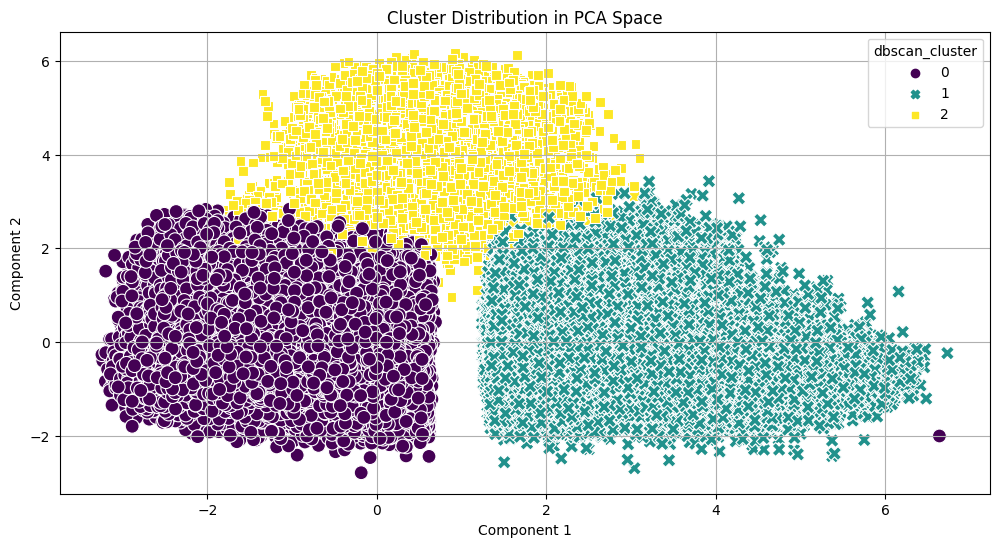


ANOVA for Component 1:
F-value: 386816.6, p-value: 0.0000
→ Statistically significant differences between clusters

ANOVA for Component 2:
F-value: 181374.7, p-value: 0.0000
→ Statistically significant differences between clusters


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='Component 1', y='Component 2', 
                hue='dbscan_cluster', palette='viridis', 
                style='dbscan_cluster', s=100)
plt.title('Cluster Distribution in PCA Space')
plt.grid()
plt.show()
# Statistical difference analysis
for feature in ['Component 1', 'Component 2']:
    print(f"\nANOVA for {feature}:")
    groups = [df1[df1['dbscan_cluster']==c][feature] for c in df1['dbscan_cluster'].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    print(f"F-value: {f_val:.1f}, p-value: {p_val:.4f}")
    if p_val < 0.05:
        print("→ Statistically significant differences between clusters")

# 3. Noise analysis
noise_points = df1[df1['dbscan_cluster'] == -1]
if not noise_points.empty:
    print("\nNoise points characteristics:")
    print(noise_points.describe().loc[['mean', 'std']])

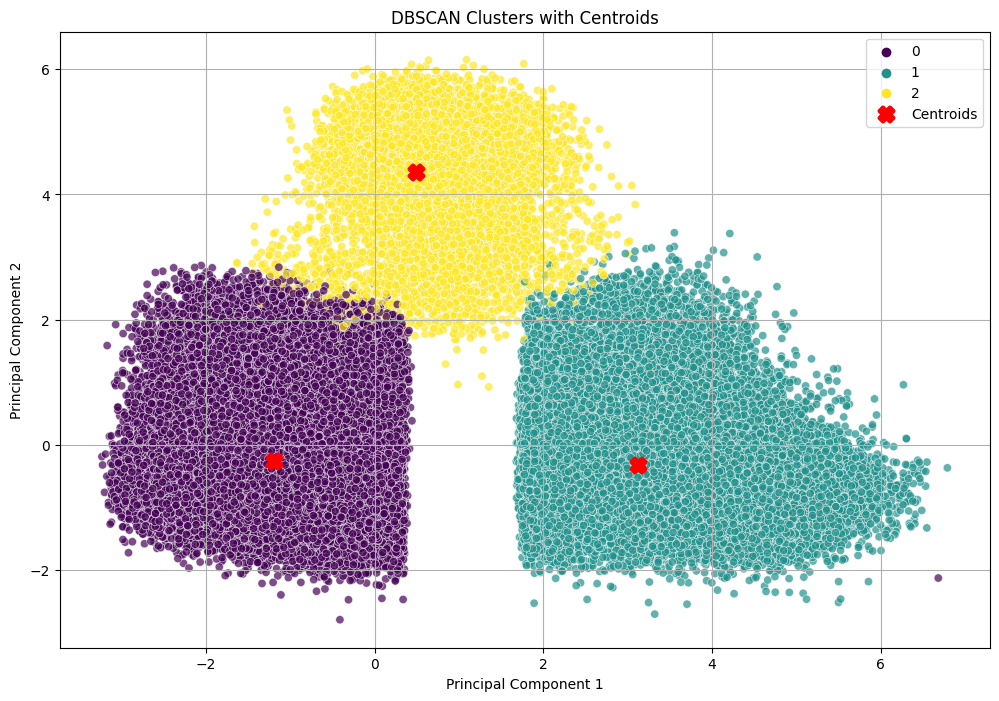

In [66]:
pca = PCA(n_components=2)
dbscan_2d = pca.fit_transform(df1.drop(['cluster', 'dbscan_cluster'], axis=1, errors='ignore'))

plt.figure(figsize=(12,8))
sns.scatterplot(x=dbscan_2d[:,0], y=dbscan_2d[:,1], 
                hue=df1['dbscan_cluster'], 
                palette='viridis',
                alpha=0.7)
plt.scatter([c[0] for c in centroid_list],
            [c[1] for c in centroid_list], 
            marker='X', 
            s=100,
            linewidths=3, 
            color='red',
            label='Centroids')
plt.title('DBSCAN Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()